In [252]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [253]:
diabetes = load_diabetes()
type(diabetes)

sklearn.utils.Bunch

In [254]:
for i,feature_name in enumerate(diabetes.feature_names):
  print(f'feature {i+1} : {feature_name}')

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


### diabetes feature에 대한 고찰

diabetes 데이터셋은 표준화 및 -0.2 ~ 0.2 범위로 스케일링 되어있다.
따라서 성별의 경우도 남자는 0.05068012, 여자는 -0.04464164로 값이 설정되어 있다.
남성:1, 여성:0의 변수를  z = ( x - \mu )/ \sigma 로 표준화한다.

age: 나이  
sex: 성별  
bmi: 체질량 지수 (Body Mass Index)  
bp: 평균 혈압 (Blood Pressure)  
s1: 총 혈청 콜레스테롤 (Total serum cholesterol)  
s2: 저밀도 지질단백질 (Low-Density Lipoproteins)  
s3: 고밀도 지질단백질 (High-Density Lipoproteins)  
s4: 혈청 트리글리세리드 (Total Triglycerides)  
s5: 혈당 (Blood sugar level)  
s6: 혈청 인슐린 (Serum insulin level)  
  
Target의 범위는 integer 25 ~ 346이다.

In [255]:
df_X[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [256]:
df_X = diabetes.data
df_y = diabetes.target
print(type(df_X), type(df_y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [257]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

In [258]:
df_X.shape

(442, 10)

In [259]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [260]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [261]:
def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

In [262]:
# LEARNING_RATE에 따른 Loss, Iteration=1000
# = 0.001 : 6411.7659, 0.01 : 5376.8202, 0.1 : 3442.9767, 1 : 27862.1015

np.random.seed(42)
W = np.random.rand(10)
b = np.random.rand()

LEARNING_RATE = 0.1

losses = []

for i in range(1, 1001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 5376.4175
Iteration 200 : Loss 4874.7562
Iteration 300 : Loss 4501.7274
Iteration 400 : Loss 4220.6593
Iteration 500 : Loss 4005.7534
Iteration 600 : Loss 3838.8161
Iteration 700 : Loss 3706.9775
Iteration 800 : Loss 3601.0984
Iteration 900 : Loss 3514.6581
Iteration 1000 : Loss 3442.9767


In [263]:
# Iteration을 10000까지 시행

np.random.seed(42)
W = np.random.rand(10)
b = np.random.rand()

LEARNING_RATE = 0.1

losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 3442.9767
Iteration 2000 : Loss 3094.0163
Iteration 3000 : Loss 2979.0079
Iteration 4000 : Loss 2933.7299
Iteration 5000 : Loss 2914.6908
Iteration 6000 : Loss 2906.1668
Iteration 7000 : Loss 2902.0766
Iteration 8000 : Loss 2899.9549
Iteration 9000 : Loss 2898.7532
Iteration 10000 : Loss 2898.0033


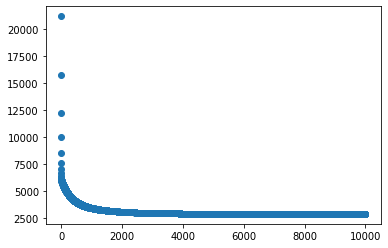

In [264]:
plt.scatter(range(len(losses)), losses)
plt.show()

Target 값도 표준화시켜서 작업 수행

In [266]:
y_train = (y_train - np.mean(y_train)) / np.std(y_train)
y_test = (y_test - np.mean(y_test)) / np.std(y_test)

In [267]:
np.random.seed(42)
W = np.random.rand(10)
b = np.random.rand()

LEARNING_RATE = 0.1

losses = []

for i in range(1, 10001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 1000 : Loss 0.5623
Iteration 2000 : Loss 0.5095
Iteration 3000 : Loss 0.4906
Iteration 4000 : Loss 0.4830
Iteration 5000 : Loss 0.4797
Iteration 6000 : Loss 0.4782
Iteration 7000 : Loss 0.4775
Iteration 8000 : Loss 0.4771
Iteration 9000 : Loss 0.4769
Iteration 10000 : Loss 0.4768


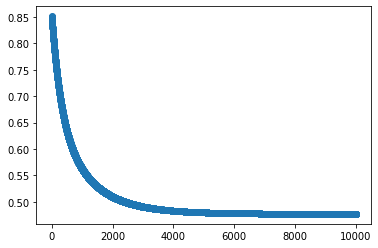

In [268]:
plt.scatter(range(len(losses)), losses)
plt.show()

In [269]:
loss(X_test, W, b, y_test)

0.5631561988571543

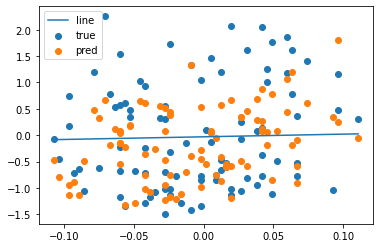

In [274]:
predictions = model(X_test, W, b)
plt.scatter(X_test[:, 0], y_test, label="true")
plt.scatter(X_test[:, 0], predictions, label="pred")

x = np.linspace(min(X_test[:, 0]), max(X_test[:, 0]), len(X_test[:, 0]))
y = x * W[0] + b
plt.plot(x, y, label="line")
plt.legend()
plt.show()

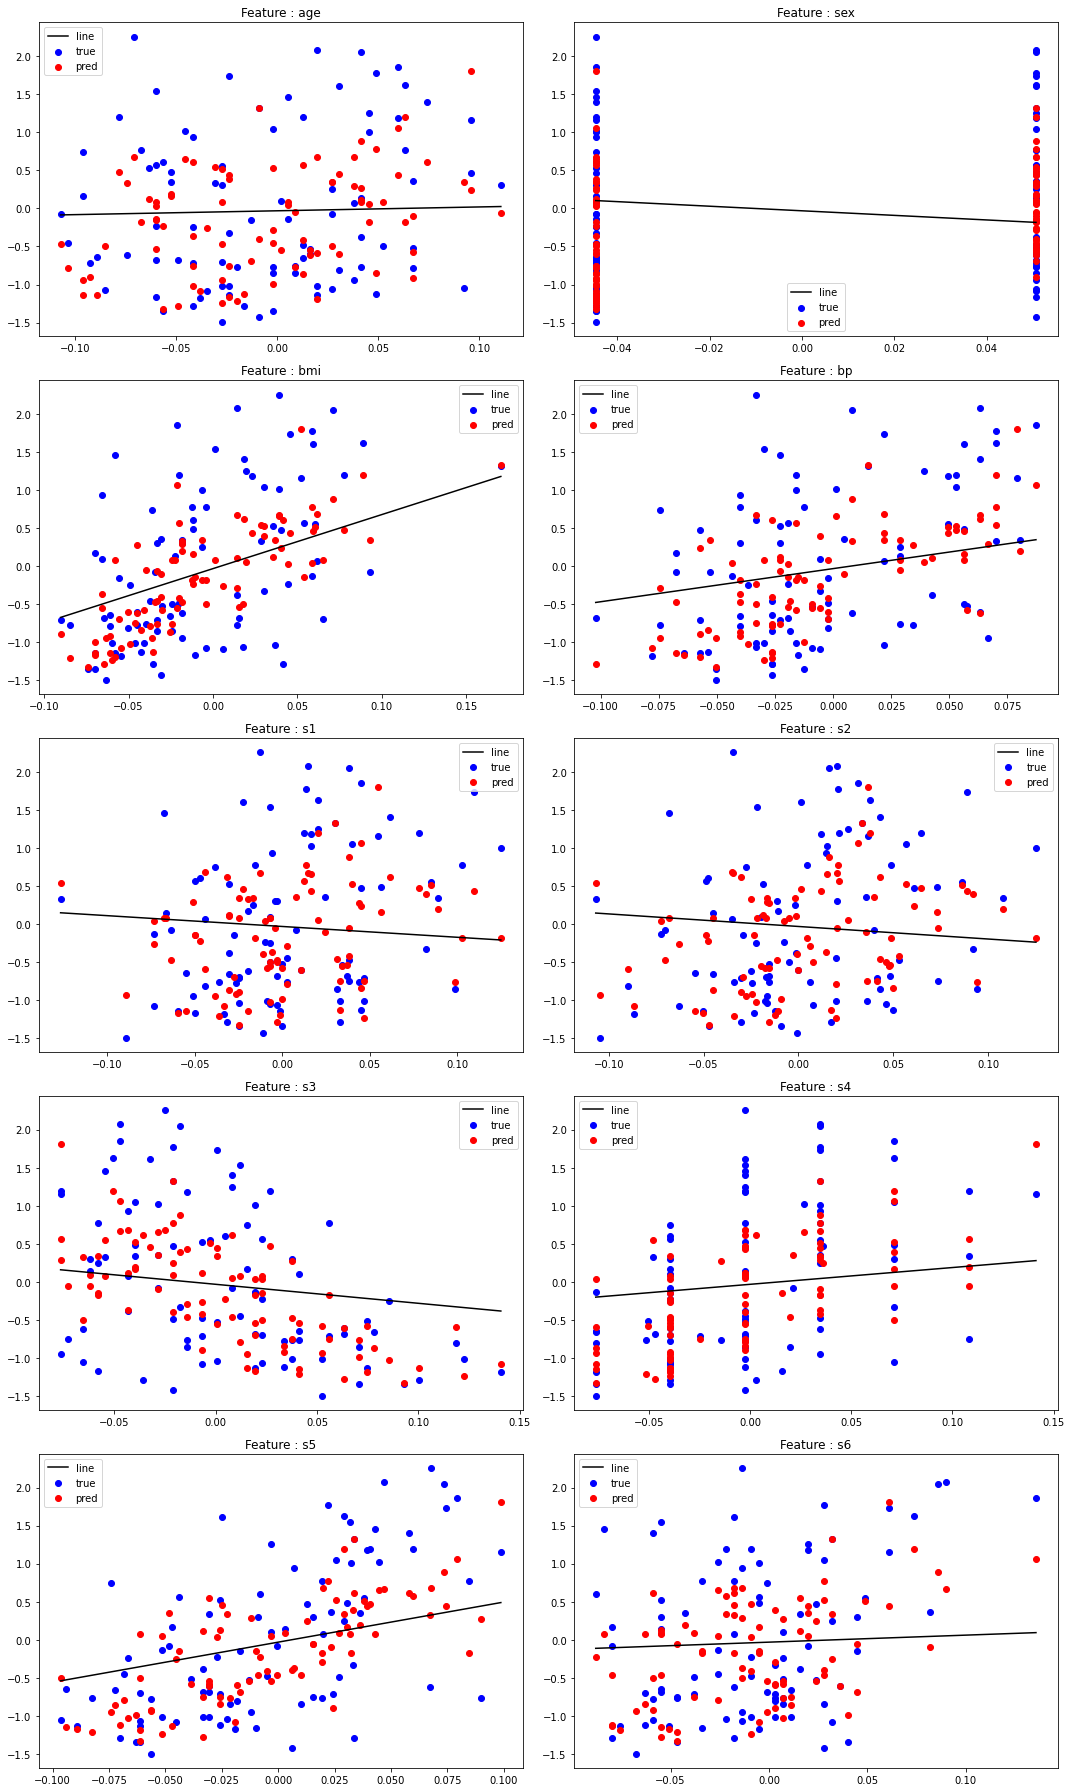

In [277]:
# 서브플롯 생성
fig, axes = plt.subplots(5, 2, figsize=(15, 25))
axes = axes.flatten()  # 2D 배열을 1D 배열로 변환하여 쉽게 인덱싱

# 그래프 그리기
for i, feature_name in enumerate(diabetes.feature_names):
    ax = axes[i]
    
    # 산점도 그리기
    ax.scatter(X_test[:, i], y_test, label="true", color="blue")
    ax.scatter(X_test[:, i], predictions, label="pred", color="red")
    
    # 선형 회귀선 그리기
    x = np.linspace(min(X_test[:, i]), max(X_test[:, i]), len(X_test[:, i]))
    y = x * W[i] + b
    ax.plot(x, y, label="line", color="black")
    
    # 그래프 제목과 범례 설정
    ax.set_title(f'Feature : {feature_name}')
    ax.legend()

# 레이아웃 조정
plt.tight_layout()
plt.show()

### Project 1에 대한 고찰

- 표준화와 스케일링은 언제 필요하며 어느정도로 진행하는 것이 좋은가? 에 대한 공부 필요
- 마지막 실험에서 Target에 대한 표준화를 진행하였을 때, Test loss가 2880.235326587965에서 0.5631561988571543로 줄었는데 그럼 엄청난 성능의 발전이 있었다고 말할 수 있는 것인가?
- 시각화를 할때 생각나는게 선형 plot 내지 scatter인데 조금 더 목적에 맞게 다양한 시각화 방안을 모색해볼 필요가 있다.


## Project 2

In [187]:
import seaborn as sns

In [233]:
# (1) 데이터 가져오기
df_train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
#df_test = pd.read_csv('~/data/data/bike-sharing-demand/test.csv')

In [217]:
df_train.shape

(10886, 12)

In [218]:
df_train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [219]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [220]:
# (2) datetime 컬럼을 datetime 자료형으로 변환하고 연,월,일,시,분,초까지 6가지 컬럼 생성하기

df_train['datetime'] = pd.to_datetime(df_train['datetime'])
df_train['year'] = df_train['datetime'].dt.year
df_train['month'] = df_train['datetime'].dt.month
df_train['day'] = df_train['datetime'].dt.day
df_train['hour'] = df_train['datetime'].dt.hour
df_train['min'] = df_train['datetime'].dt.minute
df_train['sec'] = df_train['datetime'].dt.second

In [221]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,min,sec
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


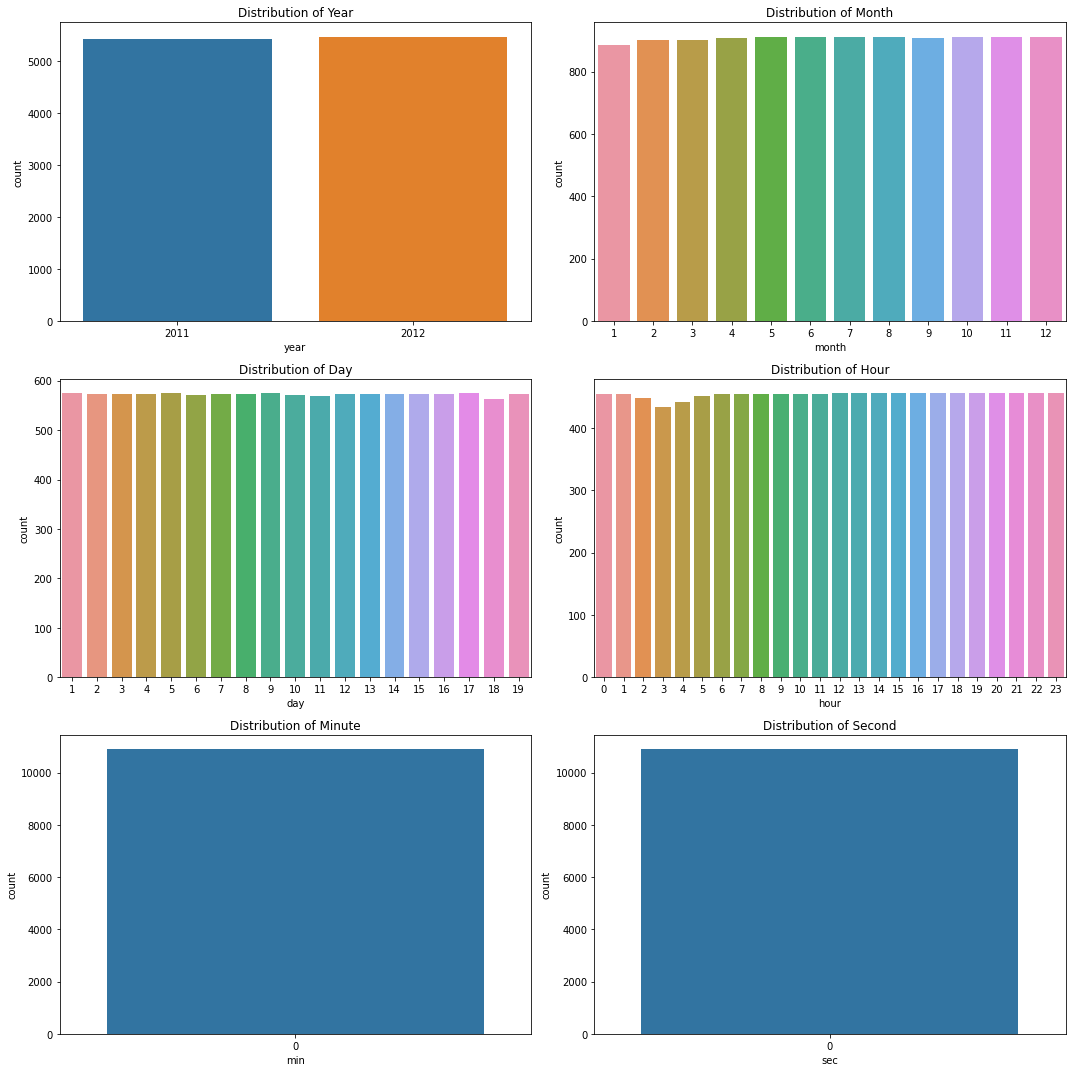

In [222]:
# (3) year, month, day, hour, minute, second 데이터 개수 시각화하기


fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

columns = ['year', 'month', 'day', 'hour', 'min', 'sec']
titles = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']

for i, col in enumerate(columns):
    sns.countplot(x=col, data=df_train, ax=axes[i])
    axes[i].set_title(f'Distribution of {titles[i]}')

plt.tight_layout()
plt.show()

min, sec는 모두 0으로 이루어져있다.  
그 외 연, 월, 일, 시는 비교적 균일하게 데이터가 분포되어 있다.  
따라서 min, sec column은 제외하고 연, 월, 일, 시 그리고 요일 칼럼을 추가한다.

In [280]:
# (4) X, y 컬럼 선택 및 train/test 데이터 분리

def preprocessing(df):
    df['datetime'] = pd.to_datetime(df['datetime'])
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['weekday'] = df['datetime'].dt.weekday
    df['hour'] = df['datetime'].dt.hour

    # One-hot encoding of the 'season' and 'weather' columns
    df = pd.get_dummies(df, columns=['season', 'weather'], prefix=['season', 'weather'])
    return df

df_train = pd.read_csv('~/data/data/bike-sharing-demand/train.csv')
datetime = df_train['datetime']
df_train = preprocessing(df_train)
df_train, df_test = train_test_split(df_train, test_size=0.2, random_state=42)

Train 데이터셋에는 casual, registered가 있으나, Test 데이터셋에는 없어서 제외함.  

In [281]:
X_train = df_train.drop(['datetime', 'count', 'casual', 'registered'], axis=1)
y_train = df_train['count']

X_test = df_test.drop(['datetime', 'count', 'casual', 'registered'], axis=1)
y_test = df_test['count']

In [282]:
def rmse(y_test, predictions):
    mse = np.mean((y_test - predictions) ** 2)
    rmse = np.sqrt(mse)
    return rmse

In [283]:
# (5) LinearRegression 모델 학습

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_squared_error 


# 가장 단순한 형태의 LinearRegression으로 모델을 학습
model = LinearRegression()

model.fit(X_train, y_train)

# (6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = rmse(y_test, predictions)
print(f"MSE : {mse}, RMSE : {rmse}")

MSE : 19785.555868000076, RMSE : 140.661138442713


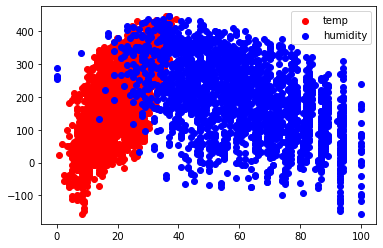

In [284]:
# (7) x축은 temp, humidity로 y축은 count로 예측 결과 시각화하기

plt.scatter(X_test['temp'], predictions, label="temp", color='red')
plt.scatter(X_test['humidity'], predictions, label="humidity", color='blue')
plt.legend()
plt.show()

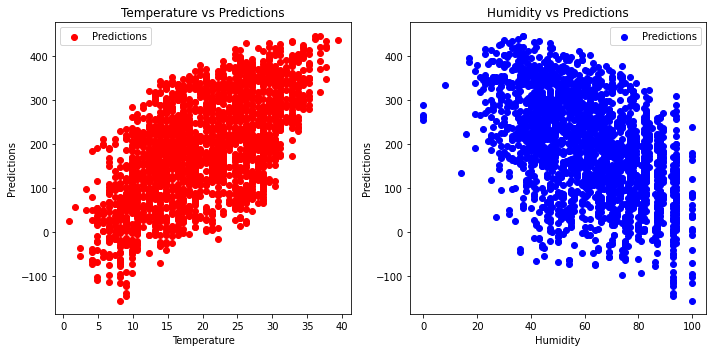

In [287]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test['temp'], predictions, color='red', label='Predictions')
plt.xlabel('Temperature')
plt.ylabel('Predictions')
plt.title('Temperature vs Predictions')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X_test['humidity'], predictions, color='blue', label='Predictions')
plt.xlabel('Humidity')
plt.ylabel('Predictions')
plt.title('Humidity vs Predictions')
plt.legend()

plt.tight_layout()
plt.show()

### Project 2에 대한 고찰

- 노드의 디렉션에 따라 진행하였고, 이상치 제거나 각 feature간의 상관관계 분석 등 추가적인 EDA는 수행하지 않았다.
- 카테고리 데이터의 경우 무조건 원핫인코딩을 진행하면 되는가?에 대해 알아볼 필요가 있다.
  * 예를들어 원핫인코딩을 하면 season_0, 1, 2, 3 간의 상관관계를 알수있는가?